In [5]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
# STEP 2 (UPDATED): Load and clean processed dataset
df = pd.read_csv("../Data/Processed/superstore_processed.csv")

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=[
    'Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category'
])

# Drop columns that are not numeric or useful for prediction
df_encoded.drop(columns=['Order ID', 'Customer ID', 'Order Date', 'Ship Date'], inplace=True)

df_encoded.head()

,Sales,Quantity,Discount,Profit,Shipping Duration,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,261.9600,2,0.00,41.9136,3,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,731.9400,3,0.00,219.5820,3,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,14.6200,2,0.00,6.8714,4,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,957.5775,5,0.45,-383.0310,7,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
4,22.3680,2,0.20,2.5164,7,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False


In [7]:
# STEP 3: Define features and target
X = df_encoded.drop(columns=['Sales'])
y = df_encoded['Sales']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
# STEP 4: Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
# STEP 5: Get top 10 important features
importances = rf.feature_importances_
feature_names = X_train.columns

top_idx = np.argsort(importances)[-10:][::-1]

top_features = pd.DataFrame({
    'Feature': feature_names[top_idx],
    'Importance': importances[top_idx]
}).reset_index(drop=True)

top_features

,Feature,Importance
0,Profit,0.839683
1,Discount,0.035513
2,Sub-Category_Supplies,0.023009
3,Quantity,0.021365
4,Shipping Duration,0.010089
5,Category_Office Supplies,0.007772
6,Sub-Category_Tables,0.005962
7,Sub-Category_Storage,0.004986
8,Category_Furniture,0.004818
9,Sub-Category_Chairs,0.004808


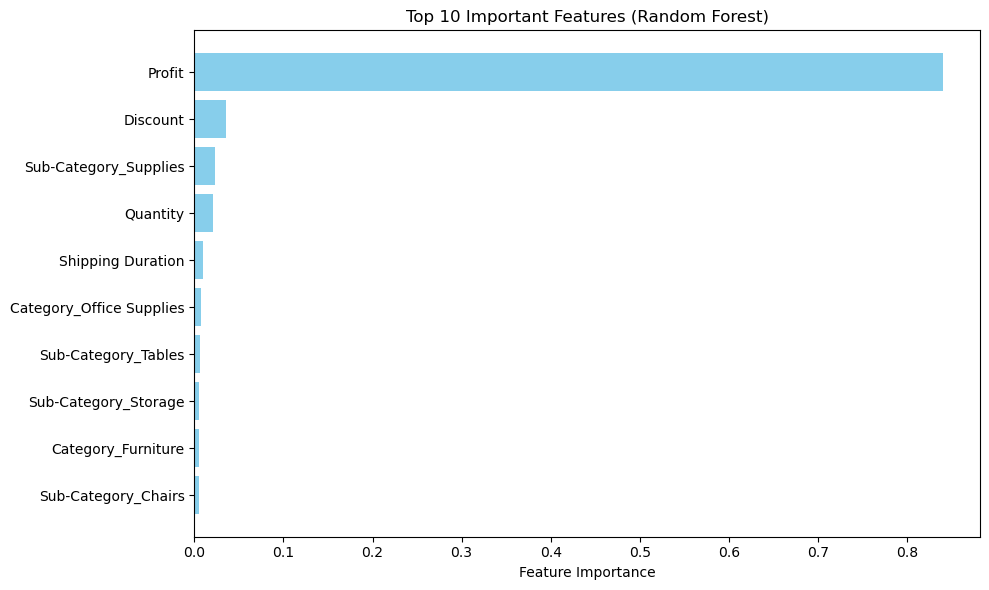

In [10]:
# STEP 6: Plot top 10 features
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [13]:
# STEP 7: Evaluate model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Accuracy (R²): {r2 * 100:.2f}%")

print(f"Evaluation Metrics (Random Forest):")
print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"MSE  (Mean Squared Error):      {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R²   (R-squared Score):          {r2:.2f}")

Random Forest Model Accuracy (R²): 58.27%
Evaluation Metrics (Random Forest):
MAE  (Mean Absolute Error):      82.79
MSE  (Mean Squared Error):      246489.69
RMSE (Root Mean Squared Error): 496.48
R²   (R-squared Score):          0.58


In [16]:
# STEP 9: Save Random Forest model
import joblib

joblib.dump(rf, "../Models/random_forest_model.pkl")
print("Random Forest model saved to: /Models/random_forest_model.pkl")

Random Forest model saved to: /Models/random_forest_model.pkl


In [18]:
# Show the input row that was used for prediction
sample_input = X_test.iloc[[0]]
sample_input

,Quantity,Discount,Profit,Shipping Duration,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
3125,4,0.2,21.1428,1,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [19]:
# Show actual sales for the same sample
y_test.iloc[0]

np.float64(563.808)

In [17]:
# STEP 10: Load model and predict on a new sample row

import joblib
import pandas as pd

# Load saved model
rf_loaded = joblib.load("../Models/random_forest_model.pkl")

# Use one row from X_test as sample input
sample_input = X_test.iloc[[0]]

# Predict
predicted_sales = rf_loaded.predict(sample_input)
print(f"Predicted Sales: ${predicted_sales[0]:.2f}")

Predicted Sales: $272.70


In [20]:
# Example: Predict sales performance for a new customer order
new_data = {
    'Quantity': [2],
    'Discount': [0.1],
    'Profit': [50],
    'Shipping Duration': [3],
    'Ship Mode_First Class': [0],
    'Ship Mode_Second Class': [1],
    'Ship Mode_Same Day': [0],
    'Ship Mode_Standard Class': [0],
    'Segment_Consumer': [1],
    'Segment_Corporate': [0],
    'Segment_Home Office': [0],
    'Region_Central': [0],
    'Region_East': [1],
    'Region_South': [0],
    'Region_West': [0],
    'Category_Furniture': [0],
    'Category_Office Supplies': [1],
    'Category_Technology': [0],
    'Sub-Category_Binders': [1],
    'Sub-Category_Chairs': [0],
    # ... fill all remaining sub-category columns as 0 or 1
}

new_df = pd.DataFrame(new_data)

# Align with training columns
missing_cols = [col for col in X_train.columns if col not in new_df.columns]
for col in missing_cols:
    new_df[col] = 0

# Reorder columns to match model input
new_df = new_df[X_train.columns]

# Predict
predicted_sales = rf_loaded.predict(new_df)
print(f"Predicted Sales Performance: ${predicted_sales[0]:.2f}")

Predicted Sales Performance: $128.27


In [23]:
# Save Actual vs Predicted Sales chart
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("📊 Actual vs Predicted Sales (Random Forest)")
plt.grid(True)
plt.tight_layout()

# Save to file
plt.savefig("../Reports/actual_vs_predicted_sales.png")
plt.close()

print("Chart saved to /Reports/actual_vs_predicted_sales.png")

Chart saved to /Reports/actual_vs_predicted_sales.png


/var/folders/mh/dmwjqxnd299cfmwfzbd4z8pc0000gn/T/ipykernel_2184/1952477542.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/mh/dmwjqxnd299cfmwfzbd4z8pc0000gn/T/ipykernel_2184/1952477542.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("../Reports/actual_vs_predicted_sales.png")
